In [1]:
# General Utilities
import re
import os
import sys
import random
import subprocess
from PIL import Image
from PIL import ImageDraw

from tqdm import tqdm

# ML / Deep learning Utilities
import cv2
import numpy as np
from numpy import loadtxt
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
%matplotlib inline

In [2]:
# Helper function to create a new folder
def mkdir(path):
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
        else:
            print("(%s) already exists" % (path))

def sliding_window(image, step_size=300, window_size=(600, 600)):
    '''
        FUNCTION: To create generator of coordinates
                  for small image of window sizes with stride and stepSize
                  
        Parameters
        ----------
        image: (numpy.ndarray) Original image to create subset of images from
        step_size: (int) Number of Pixels to slide over when getting new image
        window_size: ((int, int)) Size (Height, Width) of derived images created
        
        Returns
        -------
        Python Generator of images derived from original image
    '''
    # slide a window across the image
    for x in range(0, image.shape[1] - window_size[1], step_size):
        for y in range(0, image.shape[0] - window_size[0], step_size):
            yield (x, y, x + window_size[1], y + window_size[0])

In [3]:
# Create directory to store the processed panoramic images
mkdir('./processed_panos')

img = cv2.imread('./liquor_pano.jpg')

# Loop through each sliding window created
for idx, window in tqdm(enumerate(sliding_window(img, 300, (600, 600)))):
    Image.open('./liquor_pano.jpg').crop(window).save('./processed_panos/liquor_pano_{}.jpg'.format(idx), 'JPEG')

129it [00:21,  6.00it/s]


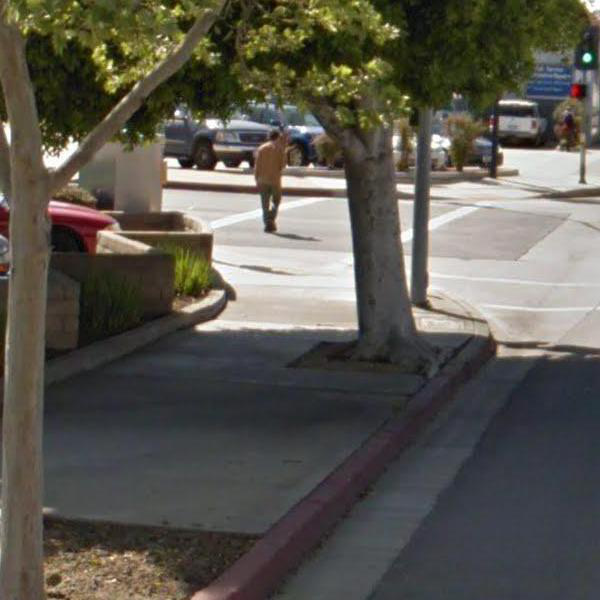

In [5]:
Image.open('./processed_panos/liquor_pano_{}.jpg'.format(idx))